<BarContainer object of 10 artists>

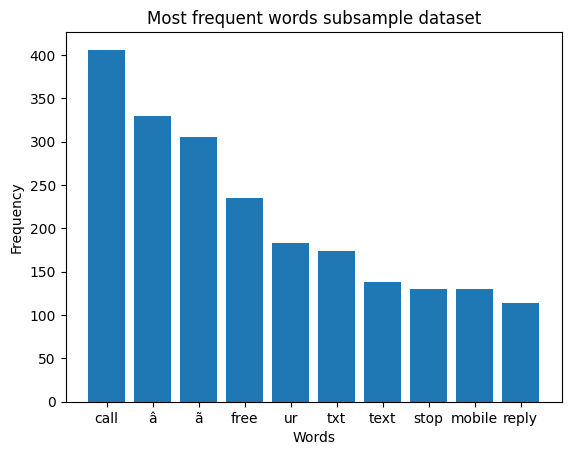

In [1]:
#frequenza parole dopo campionamento

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

def most_common_words(dataframe, num):
    return dataframe.apply(np.sum, axis=0).sort_values(ascending=False)[:num]


def plot_most_frequent_words(dataframe, num, title):
    #the most common words
    serie = most_common_words(dataframe,num)
    words = [key for key in serie.keys()]
    counts = [count for count in serie]
    plt.title(title)
    plt.ylabel("Frequency")
    plt.xlabel("Words")
    return plt.bar(words,counts)


dataframe_sub = pd.read_csv("csv_datasets/spam.csv", encoding='latin-1')
plot_most_frequent_words(dataframe_sub.drop("Class", axis="columns"), 10, "Most frequent words subsample dataset")

<BarContainer object of 15 artists>

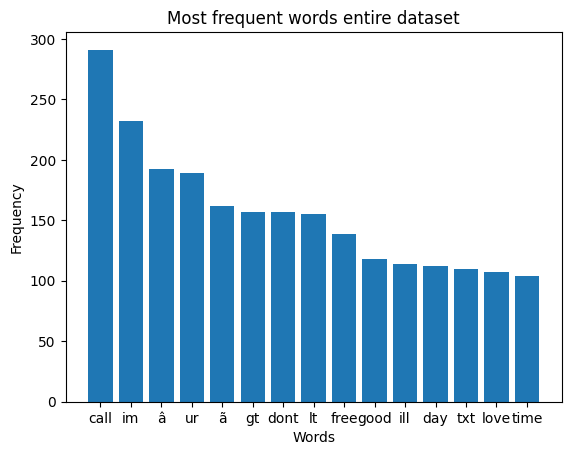

In [2]:
dataframe = pd.read_csv("csv_datasets/spam_total.csv", encoding='latin-1').dropna()
plot_most_frequent_words(dataframe.drop("Class", axis="columns"),15,"Most frequent words entire dataset")

<BarContainer object of 10 artists>

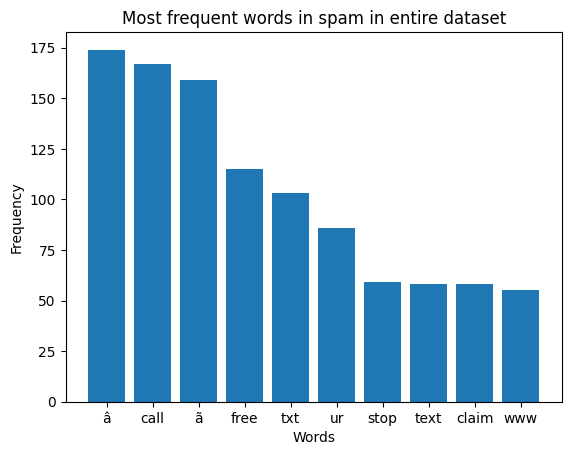

In [3]:
#frequencies in spam mails entire dataset
dataframe_spam = dataframe[dataframe['Class']=='spam'].drop("Class",axis="columns")
plot_most_frequent_words(dataframe_spam,10,"Most frequent words in spam in entire dataset")

<BarContainer object of 10 artists>

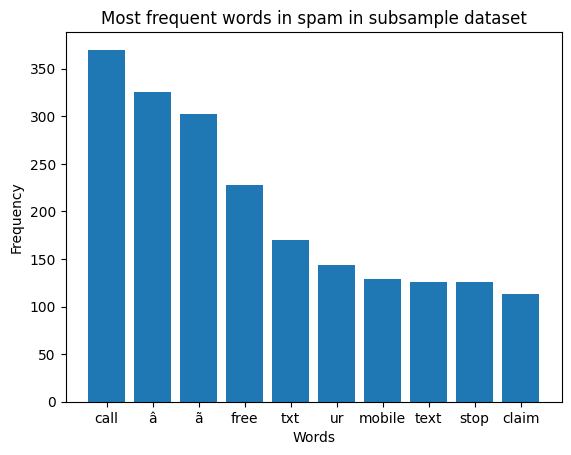

In [4]:
#frequencies in spam mails in susbset
dataframe_spam_sub = dataframe_sub[dataframe_sub['Class']=='spam'].drop("Class",axis="columns")
plot_most_frequent_words(dataframe_spam_sub,10,"Most frequent words in spam in subsample dataset")

<BarContainer object of 10 artists>

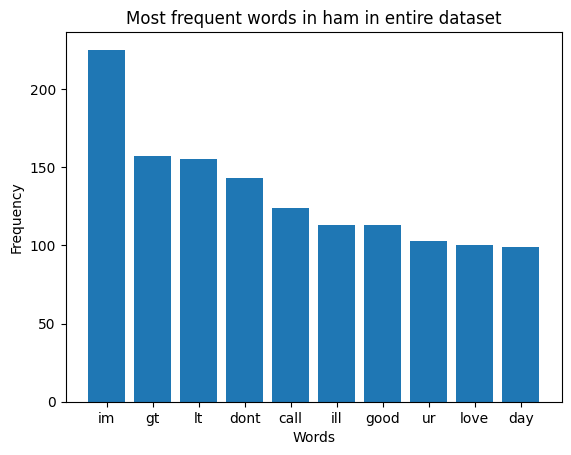

In [5]:
dataframe_ham = dataframe[dataframe['Class']=='ham'].drop("Class",axis="columns")
plot_most_frequent_words(dataframe_ham,10,"Most frequent words in ham in entire dataset")

<BarContainer object of 10 artists>

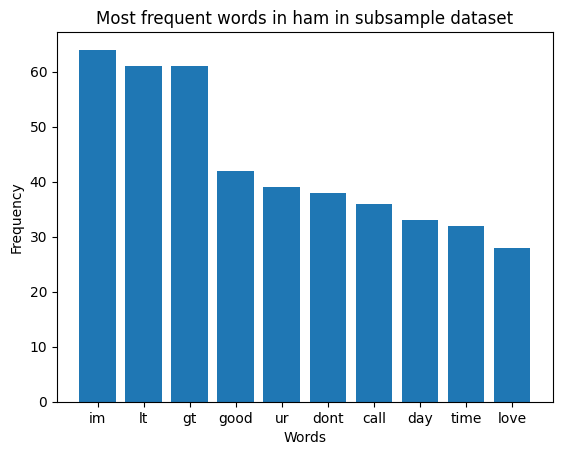

In [6]:
dataframe_sub_ham = dataframe_sub[dataframe_sub['Class']=='ham'].drop("Class",axis="columns")
plot_most_frequent_words(dataframe_sub_ham,10,"Most frequent words in ham in subsample dataset")

In [7]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import MultinomialNB

X = dataframe_sub.drop("Class",axis="columns")
y = dataframe_sub["Class"].apply(lambda x: int(x == "spam"))

#alpha = 1 -> Laplace
mnb = MultinomialNB(alpha=1)
scores = cross_val_score(mnb, X, y, cv=5)
print("%0.3f accuracy and standard error %0.3f" % (scores.mean(), scores.std()))

0.952 accuracy and standard error 0.010


c:\Users\belle\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_export.py:665: UserWarning: Glyph 155 (\x9b) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\Users\belle\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 155 (\x9b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


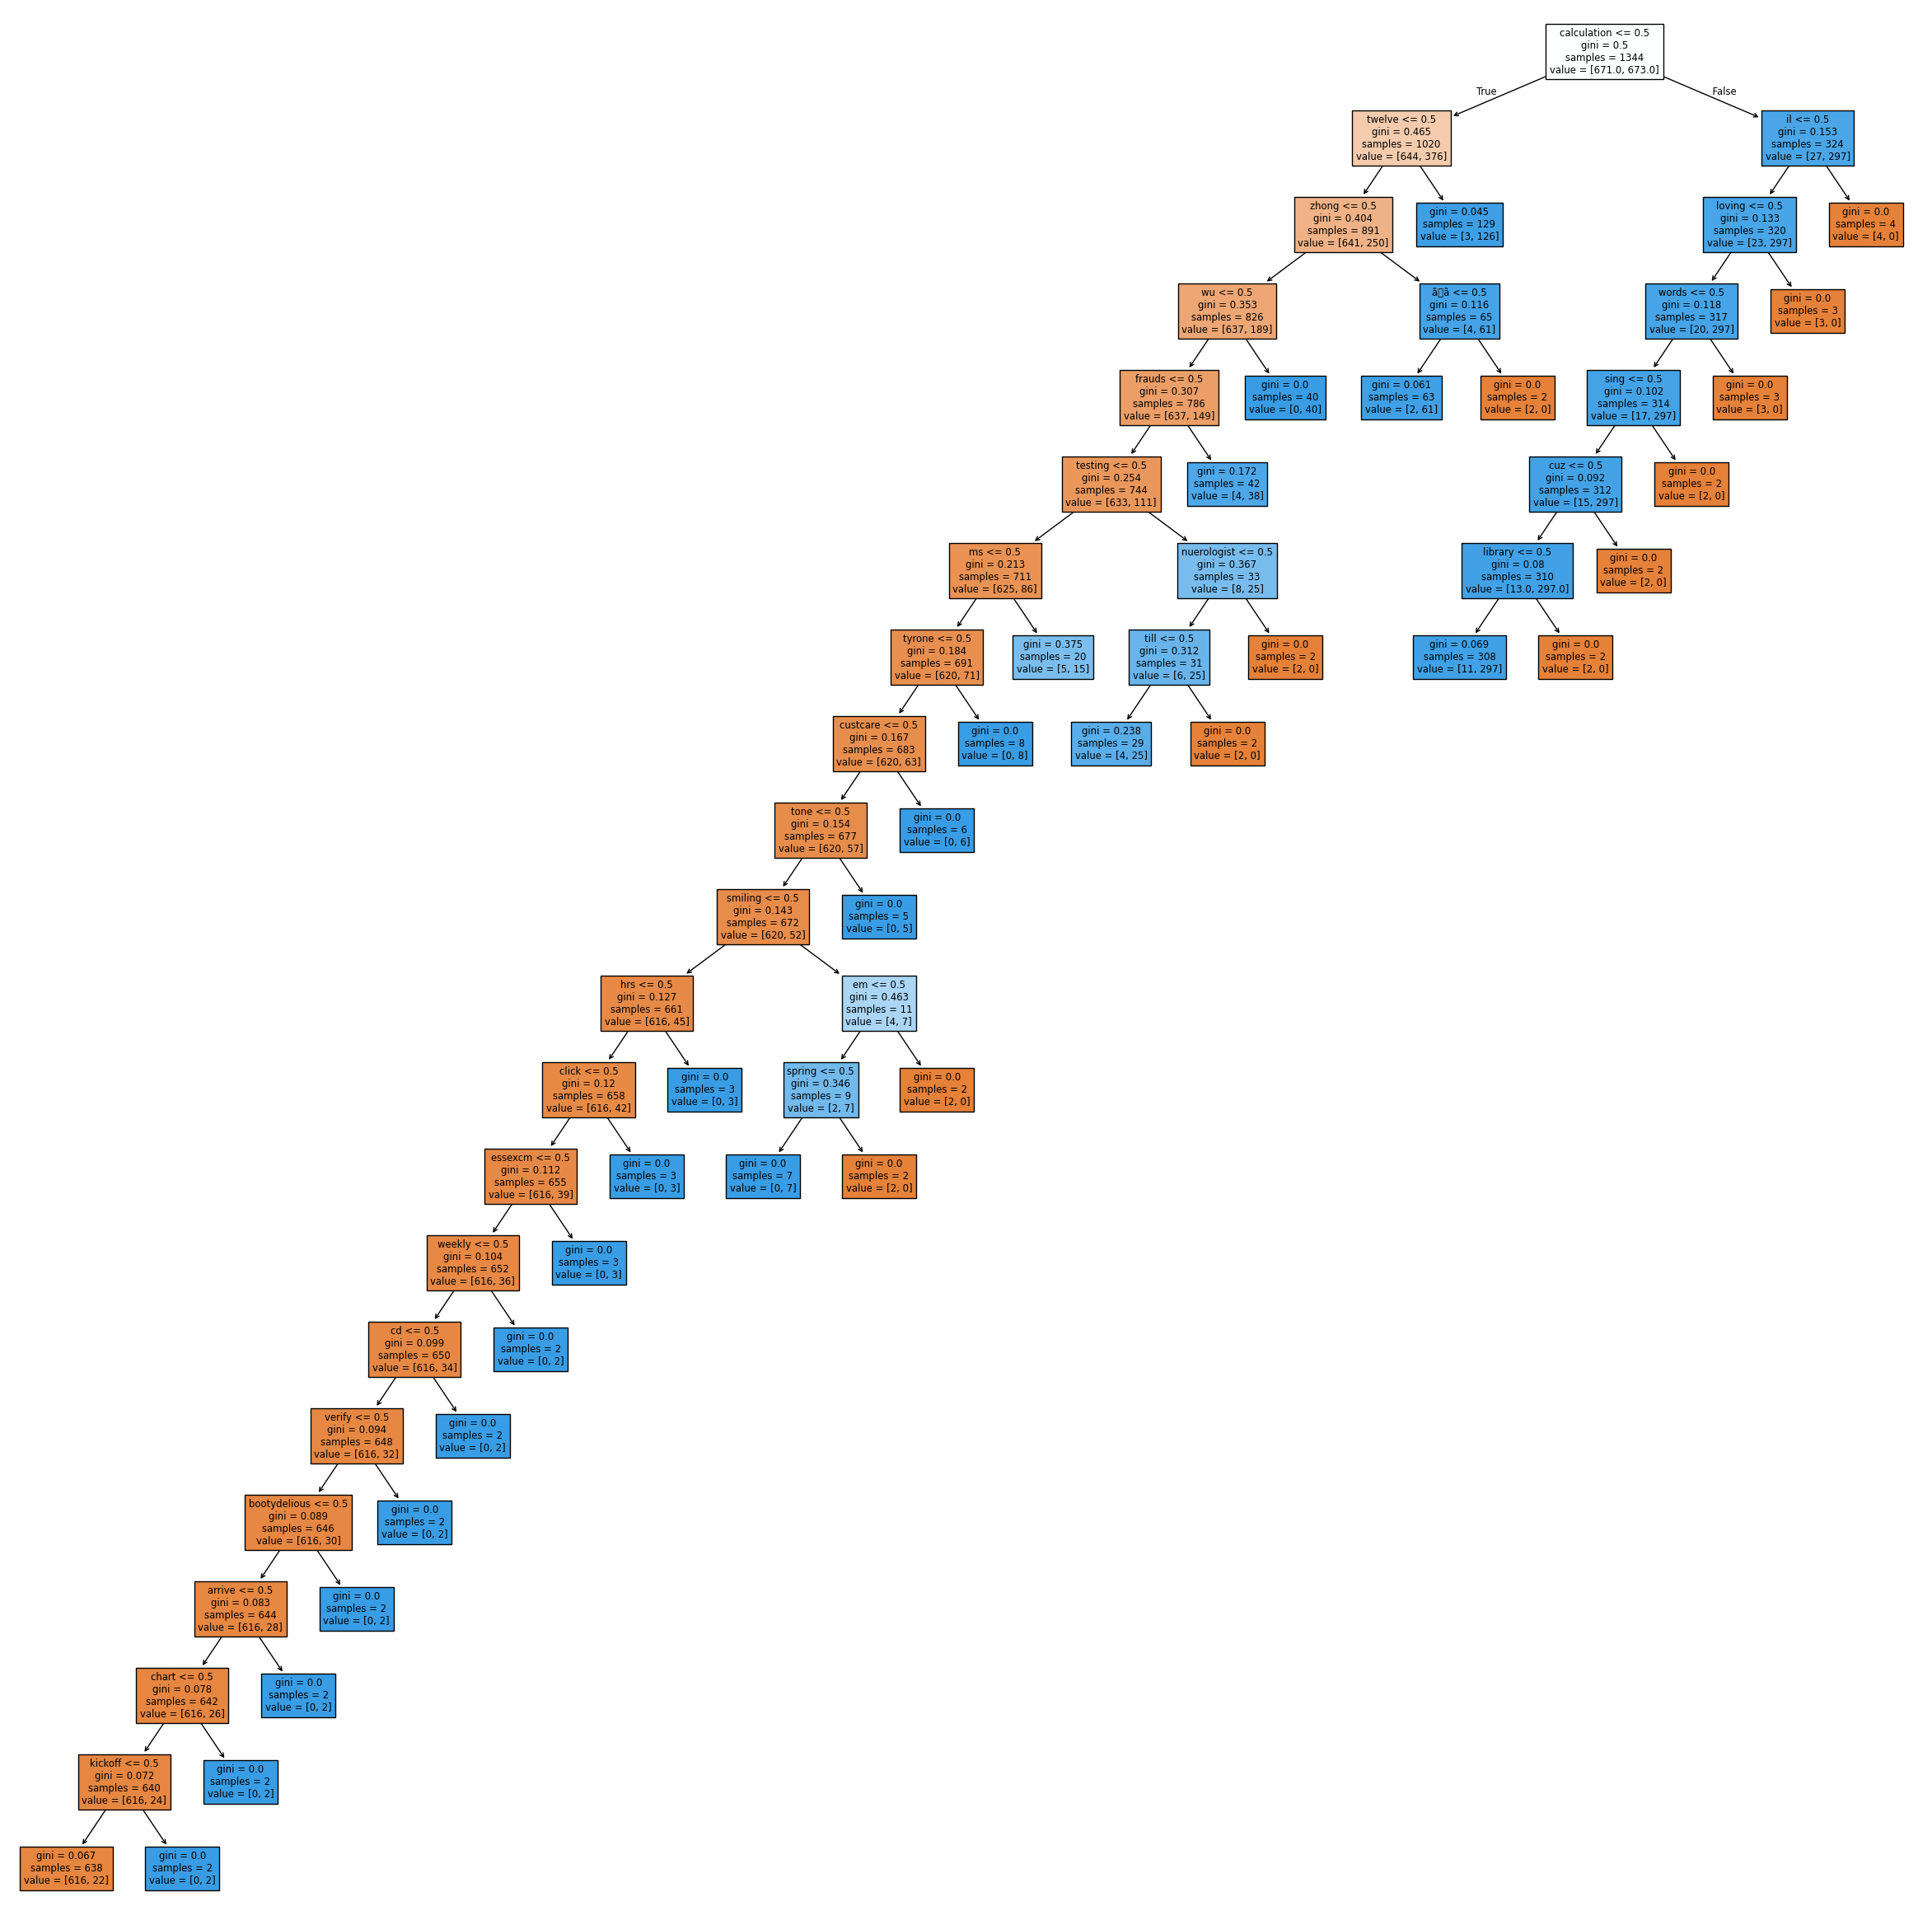

Accuracy = 0.953


In [8]:
from sklearn import tree
from sklearn.tree import plot_tree
from sympy import Matrix
from sklearn.metrics import confusion_matrix
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.1, random_state=0)
clf = tree.DecisionTreeClassifier(ccp_alpha=0.0015,random_state=0)
clf = clf.fit(X_train, Y_train)
plt.figure(figsize=(30,30))
plot_tree(clf, filled=True, feature_names = dataframe_sub.columns.values)
plt.show()
Y_pred = clf.predict(X_test)
conf = confusion_matrix(Y_pred,Y_test) 
Matrix(conf)
accuracy = (conf[0][0]+ conf[1][1])/(conf[0][0]+conf[0][1]+conf[1][0]+conf[1][1])
print("Accuracy = %.3f" % accuracy)
